# <font color=#003d5c>Vecinos más cercanos (KNN)</font>

Cuando se requiere una predicción para una instancia de datos no vistos, el algoritmo KNN buscará en el conjunto de datos de entrenamiento las k instancias más similares. El atributo de predicción de las instancias más similares se resume y se devuelve como la predicción para la instancia no vista.

La medida de similitud depende del tipo de datos. Para datos de valor real, se puede usar la **distancia euclidiana**. Se pueden usar otros tipos de datos, como los datos categóricos o binarios, donde la medida puede ser la **distancia de Hamming**.

En el caso de problemas de regresión, se puede devolver el **promedio del atributo predicho**; en el caso de la clasificación, **la clase más prevalente (moda)**.

## <font color=#003d5c>Cómo trabaja k-Nearest Neighbors</font>

Es un algoritmo de aprendizaje competitivo, porque internamente utiliza la competencia entre los elementos del modelo (instancias de datos) para tomar una decisión predictiva. La medida de similitud objetivo entre las instancias de datos hace que cada instancia de datos compita para "ganar" o sea la más similar a una instancia de datos no vista dada y contribuya a una predicción.

El aprendizaje lento se refiere al hecho de que el algoritmo no crea un modelo hasta el momento en que se requiere una predicción. Es flojo porque solo funciona en el último segundo. Esto tiene el beneficio de incluir solo datos relevantes para los datos no vistos, llamados modelos localizados. Una desventaja es que puede ser computacionalmente costoso repetir búsquedas iguales o similares en conjuntos de datos de entrenamiento más grandes.

Finalmente, kNN es poderoso porque no asume nada sobre los datos, salvo que una medida de distancia se puede calcular de manera consistente entre dos instancias. Como tal, se llama no paramétrico o no lineal ya que no asume una forma funcional.

## <font color=#003d5c>Ejemplo:</font>

,ID,SEXO,FLAG_CASADO,NRO_DEPENDIENTES,EDUCACION,FLAG_TRAB_INDEP,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,MONTO_PRESTAMO_MILES,PLAZO_PRESTAMO_MESES,FLAG_HISTORIAL_CREDITICIO,TIPO_ZONA,FLAG_CRED_HIPO
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,Bueno,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,Bueno,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,Bueno,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,Bueno,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,Bueno,Urban,Y


Importar y configurar la librería de gráfica **matplotlib**

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
%matplotlib inline

Transformemos la variable target a un valor entero

Crear un gráfico de dispersión de INGRESOS_SOLICITANTE vs MONTO_PRESTAMO_MILES por FLAG_CRED_HIPO

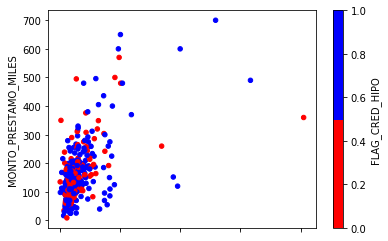

In [6]:
df.plot(kind='scatter', x='INGRESOS_SOLICITANTE', y='MONTO_PRESTAMO_MILES', c='FLAG_CRED_HIPO', colormap=cmap_bold)

Crear un gráfico de dispersión de INGRESOS_SOLICITANTE vs PLAZO_PRESTAMO_MESES por FLAG_CRED_HIPO

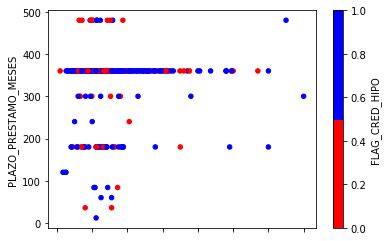

## <font color=#003d5c>Creando un clasificador KNN</font>

### <font color=#003d5c>1. Estime la similitud</font>

Para hacer predicciones necesitamos calcular la similitud entre dos instancias de datos dadas. Esto es necesario para que podamos ubicar las k instancias de datos más similares en el conjunto de datos de entrenamiento para un miembro dado del conjunto de datos de prueba y, a su vez, hacer una predicción.

Para variables numéricas podemos usar directamente la medida de distancia euclidiana. **Esto se define como la raíz cuadrada de la suma de las diferencias cuadradas entre las dos matrices de números**.

Además, queremos controlar qué campos incluir en el cálculo de distancia. Específicamente, solo queremos incluir los variables numéricas. Un enfoque es limitar la distancia euclidiana a una longitud fija, ignorando la dimensión final.

Al unir todo esto, podemos definir la función `distanciaEuclidiana` de la siguiente manera:

In [8]:
import numpy as np
def distanciaEuclidiana(instancia1, instancia2):
    distancia = (instancia1 - instancia2) ** 2
    
    if distancia.shape[0] == distancia.size:
        return distancia.sum() ** 0.5
    else:
        return distancia.sum(axis=1) ** 0.5

Distancia:  2.82842712475


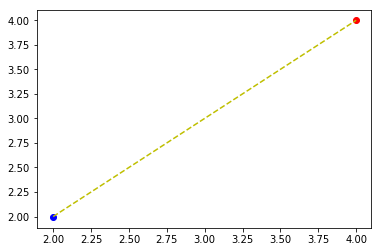

### <font color=#003d5c>2. Encontrar vecinos</font>

Ahora que tenemos una medida de similitud, podemos usarla para recopilar las k instancias más similares para una determinada instancia no vista. Este es un proceso directo de calcular la distancia para todas las instancias y seleccionar un subconjunto con los valores de distancia más pequeños.

A continuación se muestra la función `obtenerVecinos` que devuelve los k vecinos más similares del conjunto de entrenamiento para una instancia de prueba determinada (utilizando la función `DistanciaEuclidiana` ya definida)

In [11]:
conjuntoEntrenamiento = np.array([[2, 2], [4, 4], [7, 7], [4, 1], [3, 4], [5, 2]])
conjuntoTest = np.array([5, 5])

In [12]:
dist = distanciaEuclidiana(conjuntoEntrenamiento, conjuntoTest)
dist

array([ 4.24264069,  1.41421356,  2.82842712,  4.12310563,  2.23606798,  3.        ])

¿Cuáles son los dos puntos más cercanos?

array([1, 4], dtype=int64)

array([[4, 4],
       [3, 4]])

array([ 1.41421356,  2.23606798])

In [16]:
def obtenerVecinos(conjuntoEntrenamiento, conjuntoTest, k):
    dist = distanciaEuclidiana(conjuntoEntrenamiento, conjuntoTest)
    vecinos = dist.argsort()[:k]
    return vecinos

[1 4 2]


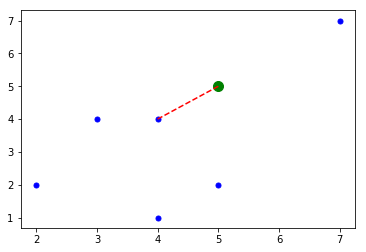

In [18]:
plt.scatter(conjuntoEntrenamiento[:, 0], conjuntoEntrenamiento[:, 1], s=25, c='b')
plt.scatter(conjuntoTest[0], conjuntoTest[1], c='g', s=100)
plt.plot([conjuntoTest[0], conjuntoEntrenamiento[vecinos[0], 0]], [conjuntoTest[1], conjuntoEntrenamiento[vecinos[0], 1]], '--r')

Probar con otra instancia de prueba

In [19]:
instanciaPrueba = np.array([3.4, 3])




[4 1 0 5]


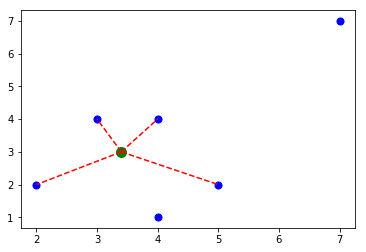

In [20]:
plt.scatter(conjuntoEntrenamiento[:, 0], conjuntoEntrenamiento[:, 1], s=50, c='b')
plt.scatter(instanciaPrueba[0], instanciaPrueba[1], c='g', s=100)
for vecino in vecinos:
    plt.plot([instanciaPrueba[0], conjuntoEntrenamiento[vecino, 0]], [instanciaPrueba[1], conjuntoEntrenamiento[vecino, 1]], '--r')

### <font color=#003d5c>3. Respuesta</font>

Una vez que hemos localizado a los vecinos más similares para una instancia de prueba, la siguiente tarea es diseñar una respuesta pronosticada basada en esos vecinos.

Podemos hacer esto al permitir que cada vecino vote por su atributo de clase, y tomar el voto de la mayoría como la predicción.

Primero vamos a definir la etiqueta de cada instancia.

In [21]:
conjuntoEntrenamiento_y = np.array([0, 0, 1, 0, 1, 1])

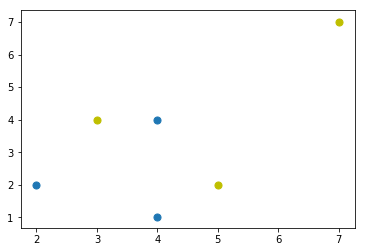

In [22]:
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 1], s=50)
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 1], c='y', s=50)

A continuación se proporciona una función para obtener la mayoría de las respuestas votadas de un número de vecinos. Asume que la clase es el último atributo para cada vecino.

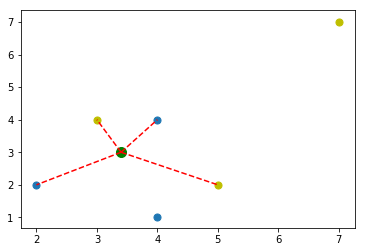

array([1, 0, 0, 1])

Contar las instancias por clase

In [25]:
from scipy.stats import itemfreq
freq = itemfreq(conjuntoEntrenamiento_y[vecinos])
freq

array([[0, 2],
       [1, 2]], dtype=int64)

0

La clase ganadora es:

0

### <font color=#003d5c>4. Probabilidad Estimada</font>

Del mismo modo, la probabilidad se puede estimar como el porcentaje de votos del vecino para cada clase

array([ 0.5,  0.5])

array([[ 0. ,  0.5],
       [ 1. ,  0.5]])

### <font color=#003d5c>5. Creando la respuesta</font>

In [30]:
def obtenerRespuesta(conjuntoEntrenamiento_y, vecinos):
    votes = conjuntoEntrenamiento_y[vecinos]
    freq = itemfreq(votes)
    return freq[:, 0][freq[:, 1].argmax()], np.vstack((freq[:, 0], freq[:, 1] / freq[:, 1].sum())).T

Podemos probar esta función con algunos vecinos de prueba, de la siguiente manera:

(0, array([[ 0. ,  0.5],
       [ 1. ,  0.5]]))


### <font color=#003d5c>6. Clasificador</font>

Ahora podemos integrar todas las funciones definidas en una sola función.

In [32]:
def knn_clasificador_de_una_instancia(conjuntoEntrenamiento, conjuntoEntrenamiento_y, instanciaPrueba, k):
    vecinos = obtenerVecinos(conjuntoEntrenamiento, instanciaPrueba, k)
    pred_y, pred_prob = obtenerRespuesta(conjuntoEntrenamiento_y, vecinos)
    return pred_y, pred_prob, vecinos

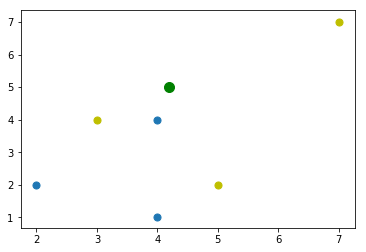

In [33]:
instanciaPrueba = np.array([4.2, 5])
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 1], s=50)
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 1], c='y', s=50)
plt.scatter(instanciaPrueba[0], instanciaPrueba[1], c='green', s=100)

(0, array([[ 0. ,  0.5],
        [ 1. ,  0.5]]))

k =  2
pred_y =  0
pred_prob =  [[ 0.   0.5]
 [ 1.   0.5]]


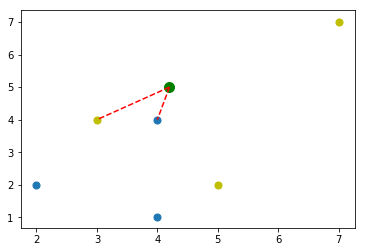

k =  3
pred_y =  1
pred_prob =  [[ 0.          0.33333333]
 [ 1.          0.66666667]]


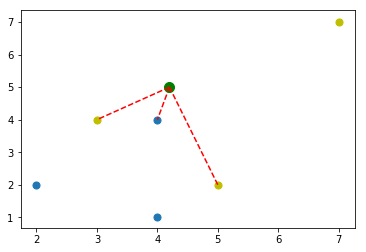

k =  4
pred_y =  1
pred_prob =  [[ 0.    0.25]
 [ 1.    0.75]]


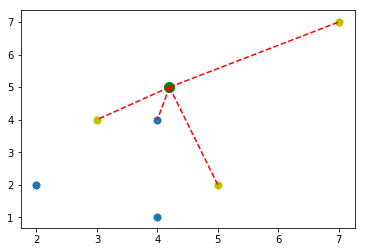

k =  5
pred_y =  1
pred_prob =  [[ 0.   0.4]
 [ 1.   0.6]]


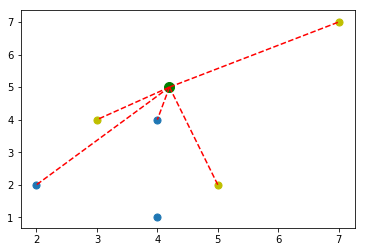

#### <font color=#003d5c>6.1. Permitir más de una instancia</font>

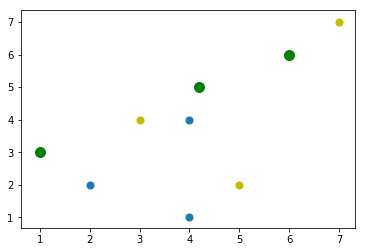

In [36]:
instanciasPrueba = np.array([[4.2, 5], [1, 3], [6, 6]])
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==0, 1], s=50)
plt.scatter(conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 0], conjuntoEntrenamiento[conjuntoEntrenamiento_y==1, 1], c='y', s=50)
plt.scatter(instanciasPrueba[:,0], instanciasPrueba[:,1], c='green', s=100)

In [37]:
def knn_clasificador(conjuntoEntrenamiento, conjuntoEntrenamiento_y, instanciasPrueba, k):
    n_instancias_prueba = instanciasPrueba.shape[0]
    pred_y = np.zeros(n_instancias_prueba)
    y_unico = np.unique(conjuntoEntrenamiento_y)
    pred_prob = np.zeros((n_instancias_prueba, y_unico.shape[0]))
    for i in range(n_instancias_prueba):
        vecinos = obtenerVecinos(conjuntoEntrenamiento, instanciasPrueba[i], k)
        pred_y_, pred_prob_ = obtenerRespuesta(conjuntoEntrenamiento_y, vecinos)
        pred_y[i] = pred_y_
        
        # pred_y podría no incluir todos los valores de "y"
        for j in range(y_unico.shape[0]):
            pred_prob[i, j] =  pred_prob_[pred_prob_[:,0] == y_unico[j], 1].sum()
            
    return pred_y, pred_prob

(array([ 1.,  0.,  1.]), array([[ 0.33333333,  0.66666667],
        [ 0.66666667,  0.33333333],
        [ 0.33333333,  0.66666667]]))

## <font color=#003d5c>Aplicar al Dataset De Hipotecario</font>

In [40]:
df['SEXO'].fillna(df['SEXO'].mode()[0], inplace=True)
df['FLAG_CASADO'].fillna(df['FLAG_CASADO'].mode()[0], inplace=True)
df['NRO_DEPENDIENTES'].fillna(df['NRO_DEPENDIENTES'].mode()[0], inplace=True)
df['FLAG_TRAB_INDEP'].fillna(df['FLAG_TRAB_INDEP'].mode()[0], inplace=True)
df['INGRESOS_COSOLICITANTE'].fillna(df['INGRESOS_COSOLICITANTE'].mean(), inplace=True)
df['MONTO_PRESTAMO_MILES'].fillna(df['MONTO_PRESTAMO_MILES'].mean(), inplace=True)
df['PLAZO_PRESTAMO_MESES'].fillna(df['PLAZO_PRESTAMO_MESES'].mean(), inplace=True)
df['FLAG_HISTORIAL_CREDITICIO'].fillna(df['FLAG_HISTORIAL_CREDITICIO'].mode()[0], inplace=True)

In [42]:
df['SEXO'] = df['SEXO'].map({'Male': 0, 'Female': 1})
df['FLAG_CASADO'] = df['FLAG_CASADO'].map({'No': 0, 'Yes': 1})
df['EDUCACION'] = df['EDUCACION'].map({'Not Graduate': 0, 'Graduate': 1})
df['FLAG_TRAB_INDEP'] = df['FLAG_TRAB_INDEP'].map({'No': 0, 'Yes': 1})
df['FLAG_HISTORIAL_CREDITICIO'] = df['FLAG_HISTORIAL_CREDITICIO'].map({'Malo': 0, 'Bueno': 1})
df = pd.concat([df, pd.get_dummies(df['TIPO_ZONA'], prefix = 'TIPO_ZONA', drop_first = True)], axis=1)
df = pd.concat([df, pd.get_dummies(df['NRO_DEPENDIENTES'], prefix = 'NRO_DEPENDIENTES', drop_first = True)], axis=1)
del df['TIPO_ZONA']
del df['NRO_DEPENDIENTES']

Index(['ID', 'SEXO', 'FLAG_CASADO', 'EDUCACION', 'FLAG_TRAB_INDEP',
       'INGRESOS_SOLICITANTE', 'INGRESOS_COSOLICITANTE',
       'MONTO_PRESTAMO_MILES', 'PLAZO_PRESTAMO_MESES',
       'FLAG_HISTORIAL_CREDITICIO', 'FLAG_CRED_HIPO', 'TIPO_ZONA_Semiurban',
       'TIPO_ZONA_Urban', 'NRO_DEPENDIENTES_1', 'NRO_DEPENDIENTES_2',
       'NRO_DEPENDIENTES_3+'],
      dtype='object')

In [45]:
y = df.FLAG_CRED_HIPO
X = df[['SEXO', 'FLAG_CASADO', 'EDUCACION', 'FLAG_TRAB_INDEP', 'INGRESOS_SOLICITANTE', 'INGRESOS_COSOLICITANTE',
        'MONTO_PRESTAMO_MILES', 'PLAZO_PRESTAMO_MESES',
        'FLAG_HISTORIAL_CREDITICIO', 'TIPO_ZONA_Semiurban',
        'TIPO_ZONA_Urban', 'NRO_DEPENDIENTES_1', 'NRO_DEPENDIENTES_2',
        'NRO_DEPENDIENTES_3+']]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=123)

array([[ 0.8,  0.2],
       [ 0.4,  0.6],
       [ 0.1,  0.9],
       [ 0.8,  0.2],
       [ 0.6,  0.4]])

array([[  9,  63],
       [ 18, 113]], dtype=int64)

0.60098522167487689

## Usando Sklearn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

array([[ 0.8,  0.2],
       [ 0.4,  0.6],
       [ 0.1,  0.9],
       [ 0.8,  0.2],
       [ 0.6,  0.4]])

array([[  9,  63],
       [ 18, 113]], dtype=int64)

0.60098522167487689

0.576354679803
0.497536945813
0.576354679803
0.581280788177
0.600985221675
0.566502463054
0.5960591133
0.600985221675
0.610837438424
0.620689655172
0.620689655172
0.620689655172
0.630541871921
0.625615763547
0.630541871921
0.615763546798
0.630541871921
0.625615763547
0.630541871921
0.625615763547
0.630541871921
0.615763546798
0.635467980296
0.630541871921
0.645320197044
0.630541871921
0.645320197044


27

## Comparando KNN con otros modelos

**Ventajas de KNN: **

- Simple de entender y explicar
- El entrenamiento modelo es rápido
-  Puede usarse para clasificación y regresión

**Desventajas de KNN:**

- Debe almacenar todos los datos de entrenamiento
- La fase de predicción puede ser lenta cuando n es grande
- Sensible a las características irrelevantes
- Sensible a la escala de los datos
- La precisión (generalmente) no es competitiva con los mejores métodos de aprendizaje supervisado